In [ ]:
!pip install prophet


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet


In [ ]:
hr_df = pd.read_csv("/content/Milestone3/data/heartrate_seconds_merged.csv")

hr_df['Time'] = pd.to_datetime(hr_df['Time'])

# Use ONLY one user
user_id = hr_df['Id'].iloc[0]
hr_df = hr_df[hr_df['Id'] == user_id]

# Prophet format
hr_df = hr_df.rename(columns={'Time': 'ds', 'Value': 'y'})
hr_df = hr_df[['ds', 'y']].sort_values('ds')


In [ ]:
model = Prophet()
model.fit(hr_df)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.


In [ ]:
forecast = model.predict(hr_df[['ds']])

hr_df['yhat'] = forecast['yhat']
hr_df['residual'] = hr_df['y'] - hr_df['yhat']


In [ ]:
threshold = 2 * hr_df['residual'].std()

hr_df['anomaly'] = np.where(
    abs(hr_df['residual']) > threshold,
    'Anomaly',
    'Normal'
)


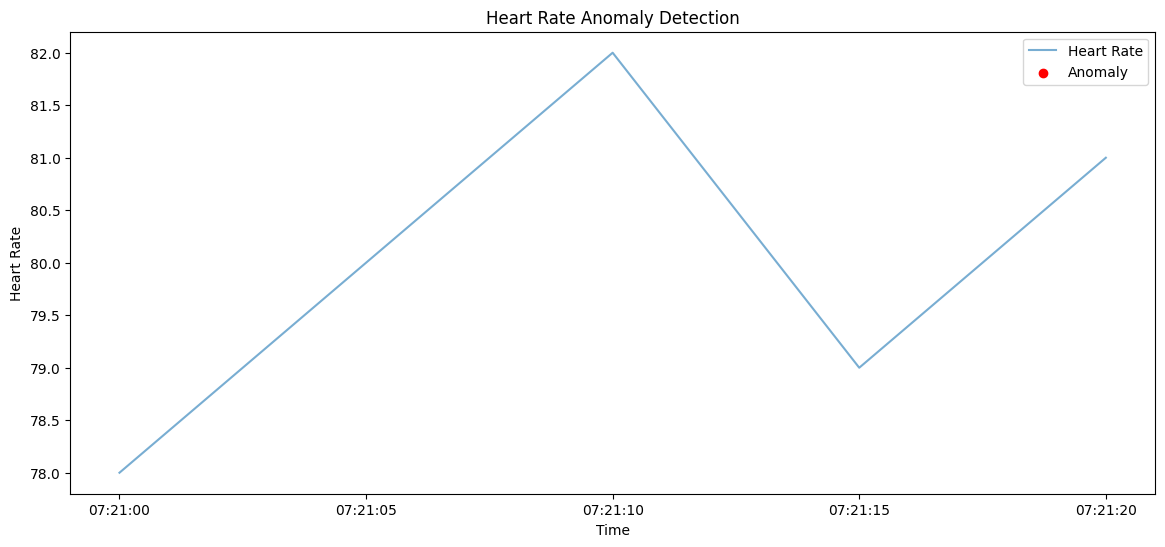

In [ ]:
plt.figure(figsize=(14,6))

plt.plot(hr_df['ds'], hr_df['y'], label='Heart Rate', alpha=0.6)

anomalies = hr_df[hr_df['anomaly'] == 'Anomaly']
plt.scatter(anomalies['ds'], anomalies['y'], color='red', label='Anomaly')

plt.title("Heart Rate Anomaly Detection")
plt.xlabel("Time")
plt.ylabel("Heart Rate")
plt.legend()

plt.savefig("/content/Milestone3/heart_rate_anomalies.png")
plt.show()


In [ ]:
sleep_df = pd.read_csv("/content/Milestone3/data/sleepDay_merged.csv")

sleep_df['SleepDay'] = pd.to_datetime(sleep_df['SleepDay'])

# Use same user
sleep_df = sleep_df[sleep_df['Id'] == user_id]


/tmp/ipython-input-1193359506.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep_df['SleepDay'] = pd.to_datetime(sleep_df['SleepDay'])


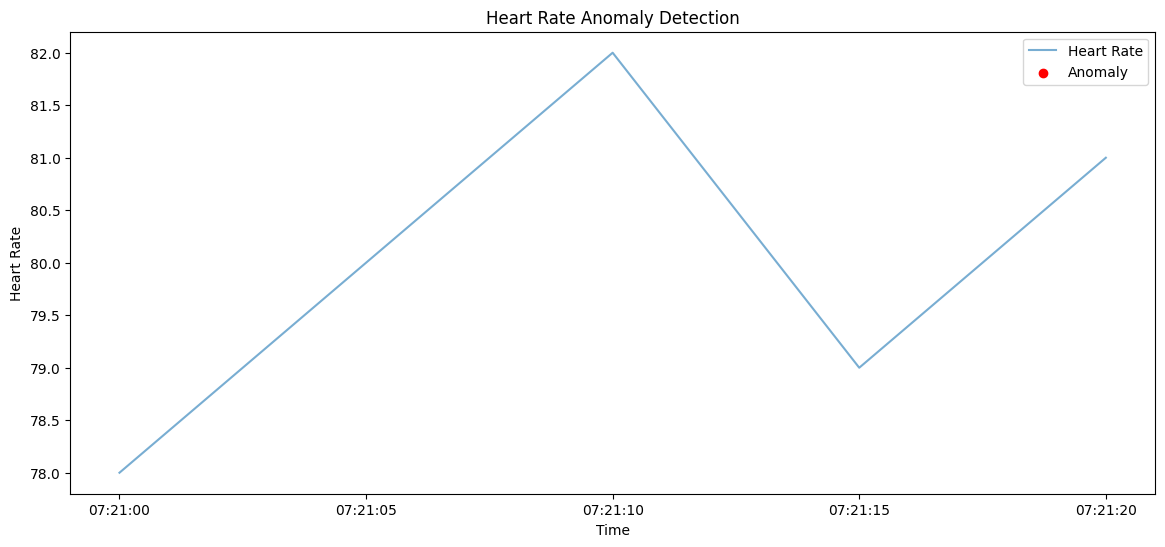

In [ ]:
plt.figure(figsize=(14,6))

plt.plot(hr_df['ds'], hr_df['y'], label='Heart Rate', alpha=0.6)

anomalies = hr_df[hr_df['anomaly'] == 'Anomaly']
plt.scatter(anomalies['ds'], anomalies['y'], color='red', label='Anomaly')

plt.title("Heart Rate Anomaly Detection")
plt.xlabel("Time")
plt.ylabel("Heart Rate")
plt.legend()

plt.savefig("/content/Milestone3/heart_rate_anomalies.png")
plt.show()


In [ ]:
sleep_df = pd.read_csv("/content/Milestone3/data/sleepDay_merged.csv")

sleep_df['SleepDay'] = pd.to_datetime(sleep_df['SleepDay'])

# Use same user
sleep_df = sleep_df[sleep_df['Id'] == user_id]


/tmp/ipython-input-1193359506.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep_df['SleepDay'] = pd.to_datetime(sleep_df['SleepDay'])


In [ ]:
mean_sleep = sleep_df['TotalMinutesAsleep'].mean()
std_sleep = sleep_df['TotalMinutesAsleep'].std()

sleep_df['anomaly'] = np.where(
    abs(sleep_df['TotalMinutesAsleep'] - mean_sleep) > 1.5 * std_sleep,
    'Anomaly',
    'Normal'
)


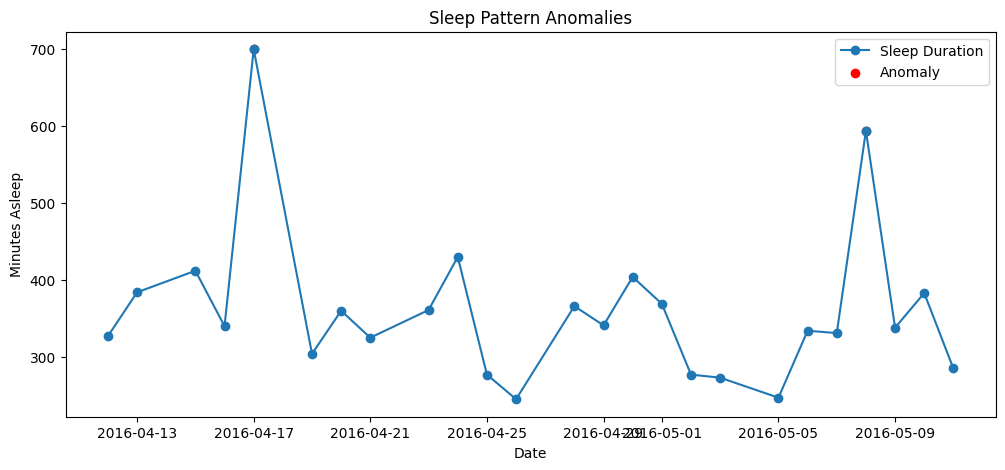

In [ ]:
plt.figure(figsize=(12,5))

plt.plot(
    sleep_df['SleepDay'],
    sleep_df['TotalMinutesAsleep'],
    marker='o',
    label='Sleep Duration'
)

sleep_anomalies = sleep_df[sleep_df['anomaly'] == 'Anomaly']
plt.scatter(
    sleep_anomalies['SleepDay'],
    sleep_anomalies['TotalMinutesAsleep'],
    color='red',
    label='Anomaly'
)

plt.title("Sleep Pattern Anomalies")
plt.xlabel("Date")
plt.ylabel("Minutes Asleep")
plt.legend()

plt.savefig("/content/Milestone3/sleep_anomalies.png")
plt.show()
